<a href="https://colab.research.google.com/github/alexjhess/pbihb-ase-causality/blob/main/colab/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis Code for PBIHB ASE Causality Project

## Setup

In [ ]:
# set seed of rng
set.seed(123)

In [26]:
# install packages (only needed when using colab)
# if not needed, change value of needed from TRUE to FASLE and run cell
needed <- TRUE

if (needed) {
  # H1
  install.packages('bnlearn')
  install.packages('GeneralisedCovarianceMeasure')
  install.packages('CondIndTests')
  # H2 & H3
  install.packages('ipw')
  install.packages('survey')
  install.packages('DoubleML')
  install.packages('mlr3')
  install.packages('mlr3learners')
  install.packages('ranger')
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Data set

In [27]:
# load data set
ase_pbihb_data <- read.csv('https://raw.githubusercontent.com/alexjhess/pbihb-ase-causality/main/data/ase_pbihb_data.txt')

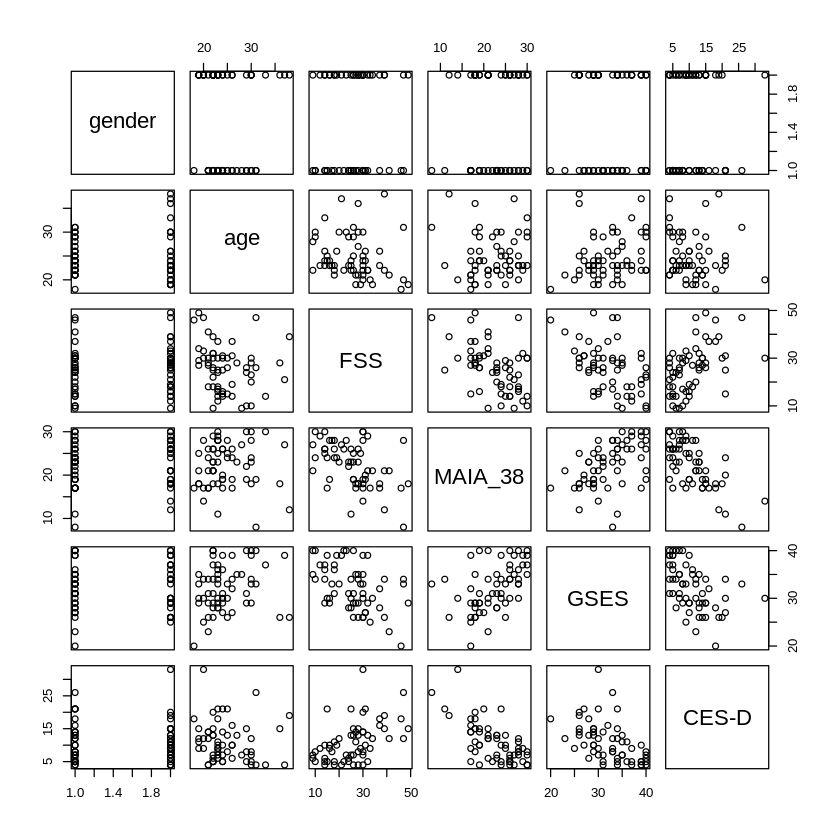

In [28]:
# select subset of vars
ase_pbihb_data <- subset(ase_pbihb_data, select = -c(9, 10))

## bring data into correct format
dat <- transform(ase_pbihb_data, gender = as.factor(gender),
                 age = as.numeric(age), FSS = as.numeric(FSS),
                 MAIA_38 = as.numeric(MAIA_38), GSES = as.numeric(GSES),
                 CESD = as.numeric(CESD))

## standardize variables (subtract mean, divide by stdev)
ase_pbihb_data <- data.frame(scale(ase_pbihb_data))
ase_pbihb_data <- transform(ase_pbihb_data, gender = as.factor(gender),
                            age = as.numeric(age), FSS = as.numeric(FSS),
                            MAIA_38 = as.numeric(MAIA_38), GSES = as.numeric(GSES),
                            CESD = as.numeric(CESD))

# visualise: matrix of scatterplots
pairs(dat[, c(1:6)],
      labels = c("gender", "age", "FSS", "MAIA_38", "GSES", "CES-D"),
      font.labels = 1
      )

___
## Hypothesis 1

In [29]:
## load packages for cond ind tests
library(bnlearn) #mi-cg
library(GeneralisedCovarianceMeasure) #GCM
library(CondIndTests) #KCI

### i)

In [30]:
# M d-sep S | A,G
ci.test(x="MAIA_38", y="GSES", z=c("age","gender"), data=dat,
        test="mi-cg")




	Mutual Information (cond. Gauss.)

data:  MAIA_38 ~ GSES | age + gender
mi-cg = 22.044, df = 2, p-value = 1.634e-05
alternative hypothesis: true value is greater than 0


In [31]:
gcm.test(X=dat$MAIA_38, Y=dat$GSES, Z=cbind(dat$age, dat$gender), alpha = 0.01)

$p.value
[1] 2.103517e-05

$test.statistic
[1] 4.25361

$reject
[1] TRUE

In [32]:
CondIndTest(Y=dat$MAIA_38, E=dat$GSES, X=cbind(dat$age, dat$gender),
            method = "KCI", alpha = 0.01, # "KCI", "InvariantConditionalQuantilePredict"InvariantEnvironmentPrediction", "InvariantResidualDistributionTest", "InvariantTargetPrediction", "ResidualPredictionTest"
            parsMethod = list(), verbose = FALSE)

$Y1
$Y1$testStatistic
[1] 26.45079

$Y1$criticalValue
[1] 11.0411

$Y1$pvalue_individual
[1] 5.194492e-06


$pvalue
[1] 5.194492e-06

### ii)

In [33]:
# M d-sep D | F, A, G
ci.test(x="MAIA_38", y="CESD", z=c("FSS","age","gender"), data=dat,
              test="mi-cg")
gcm.test(X=dat$MAIA_38, Y=dat$CESD, Z=cbind(dat$FSS, dat$age, dat$gender), alpha = 0.01)
CondIndTest(Y=dat$MAIA_38, E=dat$CESD, X=cbind(dat$FSS, dat$age, dat$gender),
            method = "KCI", alpha = 0.01,
            parsMethod = list(), verbose = FALSE)


	Mutual Information (cond. Gauss.)

data:  MAIA_38 ~ CESD | FSS + age + gender
mi-cg = 24.167, df = 2, p-value = 5.652e-06
alternative hypothesis: true value is greater than 0


$p.value
[1] 0.001742638

$test.statistic
[1] -3.130913

$reject
[1] TRUE

$Y1
$Y1$testStatistic
[1] 8.512688

$Y1$criticalValue
[1] 6.129296

$Y1$pvalue_individual
[1] 0.00134578


$pvalue
[1] 0.00134578

In [34]:
# M d-sep D | F, A, G, S
ci.test(x="MAIA_38", y="CESD", z=c("FSS","GSES","age","gender"), data=dat,
              test="mi-cg")
gcm.test(X=dat$MAIA_38, Y=dat$CESD, Z=cbind(dat$FSS, dat$GSES, dat$age, dat$gender), alpha = 0.01)
CondIndTest(Y=dat$MAIA_38, E=dat$CESD, X=cbind(dat$FSS, dat$GSES, dat$age, dat$gender),
            method = "KCI", alpha = 0.01,
            parsMethod = list(), verbose = FALSE)


	Mutual Information (cond. Gauss.)

data:  MAIA_38 ~ CESD | FSS + GSES + age + gender
mi-cg = 16.883, df = 2, p-value = 0.0002157
alternative hypothesis: true value is greater than 0


$p.value
[1] 0.01006373

$test.statistic
[1] -2.573632

$reject
[1] FALSE

$Y1
$Y1$testStatistic
[1] 2.991678

$Y1$criticalValue
[1] 3.647951

$Y1$pvalue_individual
[1] 0.02262581


$pvalue
[1] 0.02262581

### iii)

In [35]:
# F d-sep S | A, G
ci.test(x="FSS", y="GSES", z=c("age","gender"), data=dat,
        test="mi-cg")
gcm.test(X=dat$FSS, Y=dat$GSES, Z=cbind(dat$age, dat$gender), alpha = 0.01)
CondIndTest(Y=dat$FSS, E=dat$GSES, X=cbind(dat$age, dat$gender),
            method = "KCI", alpha = 0.01,
            parsMethod = list(), verbose = FALSE)


	Mutual Information (cond. Gauss.)

data:  FSS ~ GSES | age + gender
mi-cg = 13.01, df = 2, p-value = 0.001496
alternative hypothesis: true value is greater than 0


$p.value
[1] 0.0007001019

$test.statistic
[1] -3.389539

$reject
[1] TRUE

$Y1
$Y1$testStatistic
[1] 13.61286

$Y1$criticalValue
[1] 9.984298

$Y1$pvalue_individual
[1] 0.001279466


$pvalue
[1] 0.001279466

In [36]:
# F d-sep S | A, G, M
ci.test(x="FSS", y="GSES", z=c("MAIA_38","age","gender"), data=dat,
        test="mi-cg")
gcm.test(X=dat$FSS, Y=dat$GSES, Z=cbind(dat$MAIA_38, dat$age, dat$gender), alpha = 0.01)
CondIndTest(Y=dat$FSS, E=dat$GSES, X=cbind(dat$MAIA_38, dat$age, dat$gender),
            method = "KCI", alpha = 0.01,
            parsMethod = list(), verbose = FALSE)


	Mutual Information (cond. Gauss.)

data:  FSS ~ GSES | MAIA_38 + age + gender
mi-cg = 4.0568, df = 2, p-value = 0.1315
alternative hypothesis: true value is greater than 0


$p.value
[1] 0.03679854

$test.statistic
[1] -2.087992

$reject
[1] FALSE

$Y1
$Y1$testStatistic
[1] 2.013293

$Y1$criticalValue
[1] 4.204435

$Y1$pvalue_individual
[1] 0.118908


$pvalue
[1] 0.118908

___
## Hypothesis 2

In [37]:
# load packages
library(ipw)
library(survey)
library(DoubleML)
library(mlr3)
library(mlr3learners)
library(ranger)

In [38]:
###################################
#### H2: ECE of MAC on fatigue ####
###################################

## Covariate Adjustment

# linear model (M measure: MAIA_38), VAS: A,G
m1 <- lm(FSS ~ MAIA_38 + age + gender, data=ase_pbihb_data)
s1 <- summary(m1); print(s1)
pt(s1$coefficients[2,3], df = m1$df.residual, lower.tail = TRUE) # p-value of one-sided t-test
confint(m1)


Call:
lm(formula = FSS ~ MAIA_38 + age + gender, data = ase_pbihb_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.06399 -0.64614 -0.03969  0.37375  2.37695 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -0.1093     0.1594  -0.685   0.4959    
MAIA_38                  -0.4845     0.1138  -4.259 7.94e-05 ***
age                      -0.1945     0.1136  -1.712   0.0925 .  
gender0.991631652042901   0.2186     0.2258   0.968   0.3372    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8722 on 56 degrees of freedom
Multiple R-squared:  0.2779,	Adjusted R-squared:  0.2393 
F-statistic: 7.185 on 3 and 56 DF,  p-value: 0.0003648



[1] 3.967832e-05

,2.5 %,97.5 %
(Intercept),-0.4286732,0.21012290
MAIA_38,-0.7124306,-0.25659286
age,-0.4220504,0.03314583
gender0.991631652042901,-0.2337102,0.67081088


In [39]:
# VAS: A,G,S
m2 <- lm(FSS ~ MAIA_38 + age + gender + GSES, data=ase_pbihb_data)
s2 <- summary(m2); print(s2)
pt(s2$coefficients[2,3], df = m2$df.residual, lower.tail = TRUE) # p-value of one-sided t-test
confint(m2)


Call:
lm(formula = FSS ~ MAIA_38 + age + gender + GSES, data = ase_pbihb_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5576 -0.4423 -0.2249  0.4797  2.3964 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)              -0.1067     0.1550  -0.688  0.49405   
MAIA_38                  -0.3545     0.1273  -2.785  0.00732 **
age                      -0.1356     0.1141  -1.189  0.23954   
gender0.991631652042901   0.2134     0.2195   0.972  0.33510   
GSES                     -0.2690     0.1303  -2.064  0.04371 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8479 on 55 degrees of freedom
Multiple R-squared:  0.3299,	Adjusted R-squared:  0.2811 
F-statistic: 6.768 on 4 and 55 DF,  p-value: 0.0001669



[1] 0.003662232

,2.5 %,97.5 %
(Intercept),-0.4173304,0.20390751
MAIA_38,-0.6095560,-0.09941659
age,-0.3642073,0.09296171
gender0.991631652042901,-0.2264207,0.65326642
GSES,-0.5301168,-0.00785879


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8697  0.9524  1.0083  0.9999  1.0493  1.1783 


Call:
glm(formula = MAIA_38 ~ 1, data = ase_pbihb_data, na.action = na.fail)

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 3.742e-17  1.291e-01       0        1

(Dispersion parameter for gaussian family taken to be 1)

    Null deviance: 59  on 59  degrees of freedom
Residual deviance: 59  on 59  degrees of freedom
AIC: 173.26

Number of Fisher Scoring iterations: 2



Call:
glm(formula = MAIA_38 ~ age + gender, data = ase_pbihb_data, 
    na.action = na.fail)

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)             -0.061838   0.185435  -0.333    0.740
age                      0.005026   0.132265   0.038    0.970
gender0.991631652042901  0.123675   0.262317   0.471    0.639

(Dispersion parameter for gaussian family taken to be 1.031015)

    Null deviance: 59.000  on 59  degrees of freedom
Residual deviance: 58.768  on 57  degrees of freedom
AIC: 177.03

Number of Fisher Scoring iterations: 2



Call:
svyglm(formula = FSS ~ MAIA_38, design = svydesign(~1, weights = ~sw, 
    data = ase_pbihb_data))

Survey design:
svydesign(~1, weights = ~sw, data = ase_pbihb_data)

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.001093   0.112888  -0.010 0.992309    
MAIA_38     -0.481621   0.117696  -4.092 0.000134 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.7661077)

Number of Fisher Scoring iterations: 2



[1] 6.689398e-05

,2.5 %,97.5 %
(Intercept),-0.2270624,0.2248766
MAIA_38,-0.7172145,-0.2460279


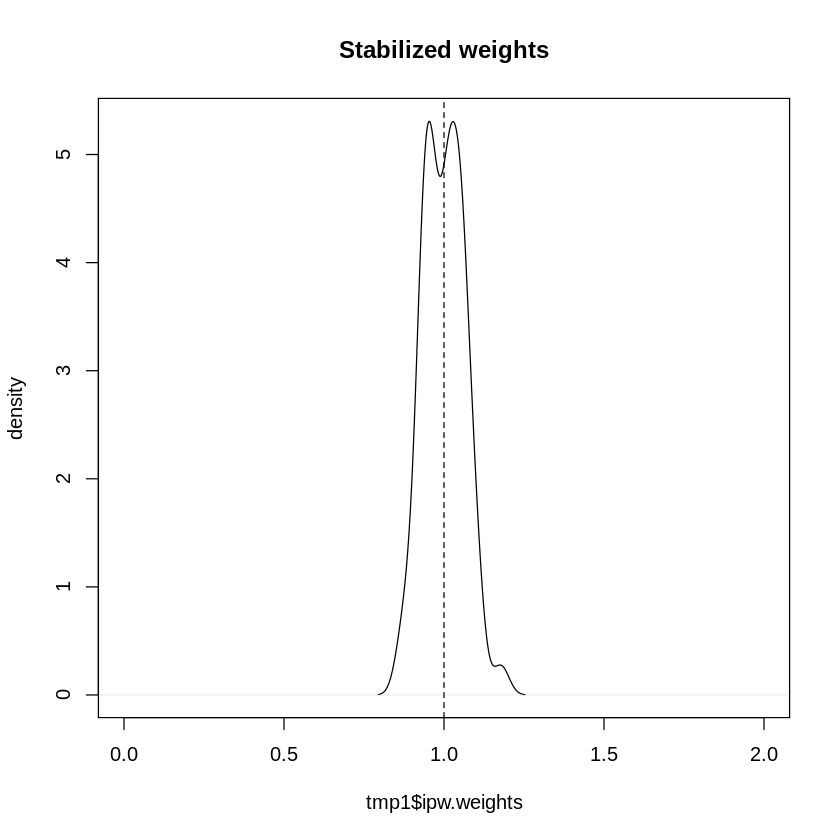

In [40]:
#_______________
## use propensity score (IPW) for ECE from M to F
tmp1 <- ipwpoint(
  exposure = MAIA_38,
  family = "gaussian",
  link = "glm",
  numerator = ~ 1,
  denominator = ~ age + gender,
  data = ase_pbihb_data
)
# weights
summary(tmp1$ipw.weights)
ipwplot(weights = tmp1$ipw.weights, logscale = FALSE,
        main = "Stabilized weights", xlim = c(0,2))
# numerator & denominator models
summary(tmp1$num.mod)
summary(tmp1$den.mod)
# pasting IPW weights to data set
ase_pbihb_data$sw <- tmp1$ipw.weights
# weighting observations by stabilized weights to adjust for confounding (fit MSM)
msm1 <- (svyglm(FSS ~ MAIA_38, design = svydesign(~1, weights = ~sw, data=ase_pbihb_data)))
s1_msm <- summary(msm1); print(s1_msm)
pt(s1_msm$coefficients[2,3], df = msm1$df.residual, lower.tail = TRUE) # p-value of one-sided t-test
confint(msm1)


Call:
svyglm(formula = FSS ~ MAIA_38, design = svydesign(~1, weights = ~sw1a, 
    data = ase_pbihb_data))

Survey design:
svydesign(~1, weights = ~sw1a, data = ase_pbihb_data)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -0.1578     0.1371  -1.151   0.2545  
MAIA_38      -0.3775     0.1573  -2.400   0.0196 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.8492527)

Number of Fisher Scoring iterations: 2



[1] 0.009806189

[1] 0.009806189

,2.5 %,97.5 %
(Intercept),-0.4322405,0.11663463
MAIA_38,-0.6924031,-0.06269128


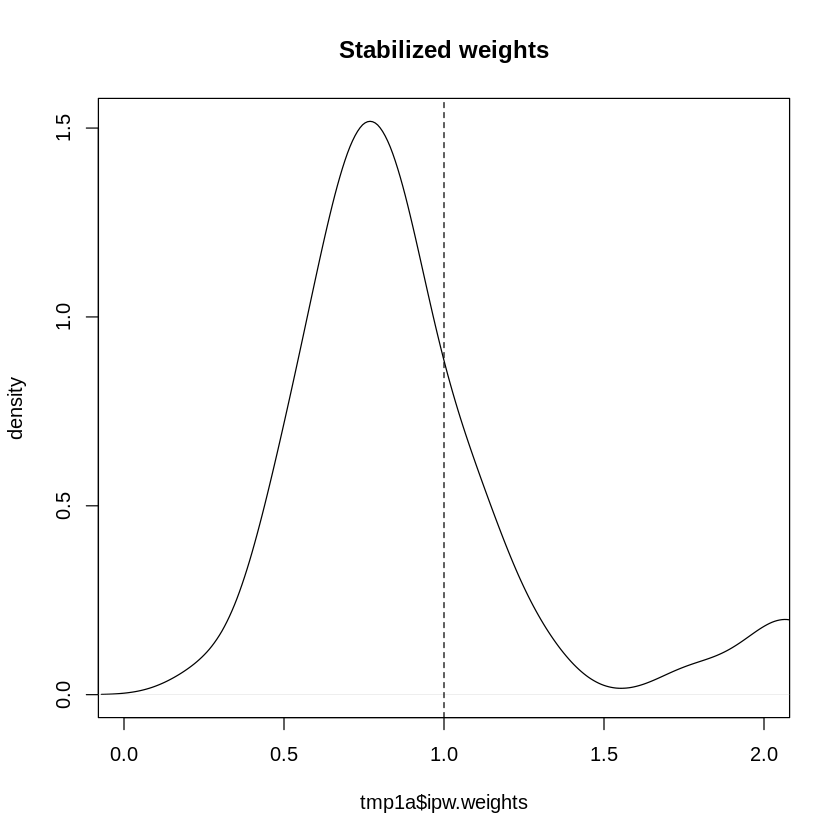

In [41]:
## use different VAS: A,G,S
tmp1a <- ipwpoint(exposure = MAIA_38, family = "gaussian", link = "glm",
  numerator = ~ 1, denominator = ~ age + gender + GSES, data = ase_pbihb_data)
ipwplot(weights = tmp1a$ipw.weights, logscale = FALSE, main = "Stabilized weights", xlim = c(0,2))
ase_pbihb_data$sw1a <- tmp1a$ipw.weights
msm1a <- (svyglm(FSS ~ MAIA_38, design = svydesign(~1, weights = ~sw1a, data=ase_pbihb_data)))
s1_msm1a <- summary(msm1a); print(s1_msm1a)
pt(s1_msm1a$coefficients[2,3], df = msm1a$df.residual, lower.tail = TRUE) # p-value of one-sided t-test
s1_msm1a$coefficients[2,4]/2 # p-value for one-sided t-test
confint(msm1a)

In [42]:
# _______________________________________
## use doubleML for ECE
set.seed(1234)

# implement causal model (inference on effect of variable d on y, confounds x)
obj_dml_data <- double_ml_data_from_data_frame(df = ase_pbihb_data,
                               x_cols = c("age","gender"),
                               y_col = "FSS",
                               d_col = "MAIA_38")

# chose machine learning method
n_vars = 2 #number of covariates x
# init random forests learner with specified params
ml_l = lrn("regr.ranger", num.trees = 100, mtry = n_vars, min.node.size = 2, max.depth = 5)
ml_m = lrn("regr.ranger", num.trees = 100, mtry = n_vars, min.node.size = 2, max.depth = 5)
ml_g = lrn("regr.ranger", num.trees = 100, mtry = n_vars, min.node.size = 2, max.depth = 5)

doubleml_plr = DoubleMLPLR$new(obj_dml_data, ml_l, ml_m, ml_g, n_folds = 2, score = "IV-type")
doubleml_plr

# est causal effect of d on y
set.seed(123)
doubleml_plr$fit()
doubleml_plr$summary()
doubleml_plr$t_stat
doubleml_plr$pval/2 # p-value for one-sided t-test
doubleml_plr$confint()

fit() not yet called.



================= DoubleMLPLR Object ==================


------------------ Data summary      ------------------
Outcome variable: FSS
Treatment variable(s): MAIA_38
Covariates: age, gender
Instrument(s): 
No. Observations: 60

------------------ Score & algorithm ------------------
Score function: IV-type
DML algorithm: dml2

------------------ Machine learner   ------------------
ml_l: regr.ranger
ml_m: regr.ranger
ml_g: regr.ranger

------------------ Resampling        ------------------
No. folds: 2
No. repeated sample splits: 1
Apply cross-fitting: TRUE

------------------ Fit summary       ------------------
 

INFO  [14:16:57.483] [mlr3] Applying learner 'regr.ranger' on task 'nuis_l' (iter 1/2)
INFO  [14:16:57.517] [mlr3] Applying learner 'regr.ranger' on task 'nuis_l' (iter 2/2)
INFO  [14:16:57.679] [mlr3] Applying learner 'regr.ranger' on task 'nuis_m' (iter 1/2)
INFO  [14:16:57.708] [mlr3] Applying learner 'regr.ranger' on task 'nuis_m' (iter 2/2)
INFO  [14:16:57.872] [mlr3] Applying learner 'regr.ranger' on task 'nuis_g' (iter 1/2)
INFO  [14:16:57.905] [mlr3] Applying learner 'regr.ranger' on task 'nuis_g' (iter 2/2)
Estimates and significance testing of the effect of target variables
        Estimate. Std. Error t value Pr(>|t|)   
MAIA_38   -0.3872     0.1331  -2.908  0.00363 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




MAIA_38 
-2.908214

MAIA_38 
0.001817497

,2.5 %,97.5 %
MAIA_38,-0.6480817,-0.1262369


In [43]:
## different VAS: A,G,S
# implement causal model (inference on effect of variable d on y, confounds x)
obj_dml_data1b <- double_ml_data_from_data_frame(df = ase_pbihb_data,
                                               x_cols = c("age","gender","GSES"),
                                               y_col = "FSS",
                                               d_col = "MAIA_38")
# chose machine learning method
n_vars = 3 #number of covariates x
# init random forests learner with specified params
ml_l1b = lrn("regr.ranger", num.trees = 100, mtry = n_vars, min.node.size = 2, max.depth = 5)
ml_m1b = lrn("regr.ranger", num.trees = 100, mtry = n_vars, min.node.size = 2, max.depth = 5)
ml_g1b = lrn("regr.ranger", num.trees = 100, mtry = n_vars, min.node.size = 2, max.depth = 5)
doubleml_plr1b = DoubleMLPLR$new(obj_dml_data1b, ml_l1b, ml_m1b, ml_g1b, n_folds = 2, score = "IV-type")
doubleml_plr1b
# est causal effect of d on y
set.seed(123)
doubleml_plr1b$fit()
doubleml_plr1b$summary()
doubleml_plr1b$t_stat
doubleml_plr1b$pval/2 # p-value for one-sided t-test
doubleml_plr1b$confint()

fit() not yet called.



================= DoubleMLPLR Object ==================


------------------ Data summary      ------------------
Outcome variable: FSS
Treatment variable(s): MAIA_38
Covariates: age, gender, GSES
Instrument(s): 
No. Observations: 60

------------------ Score & algorithm ------------------
Score function: IV-type
DML algorithm: dml2

------------------ Machine learner   ------------------
ml_l: regr.ranger
ml_m: regr.ranger
ml_g: regr.ranger

------------------ Resampling        ------------------
No. folds: 2
No. repeated sample splits: 1
Apply cross-fitting: TRUE

------------------ Fit summary       ------------------
 

INFO  [14:16:58.449] [mlr3] Applying learner 'regr.ranger' on task 'nuis_l' (iter 1/2)
INFO  [14:16:58.482] [mlr3] Applying learner 'regr.ranger' on task 'nuis_l' (iter 2/2)
INFO  [14:16:58.671] [mlr3] Applying learner 'regr.ranger' on task 'nuis_m' (iter 1/2)
INFO  [14:16:58.701] [mlr3] Applying learner 'regr.ranger' on task 'nuis_m' (iter 2/2)
INFO  [14:16:58.864] [mlr3] Applying learner 'regr.ranger' on task 'nuis_g' (iter 1/2)
INFO  [14:16:58.895] [mlr3] Applying learner 'regr.ranger' on task 'nuis_g' (iter 2/2)
Estimates and significance testing of the effect of target variables
        Estimate. Std. Error t value Pr(>|t|)
MAIA_38   -0.2049     0.1826  -1.122    0.262




MAIA_38 
-1.122248

MAIA_38 
0.1308786

,2.5 %,97.5 %
MAIA_38,-0.5627463,0.1529492


___
## Hypothesis 3

In [44]:
################################################################################
#### H3: ECE of fatigue*self-efficacy on depression ############################
################################################################################

## linear models
# VAS: A,G
m11 <- lm(CESD ~ FSS + GSES + FSS*GSES + age + gender, data=ase_pbihb_data)
s11 <- summary(m11); print(s11)
pt(s11$coefficients[6,3], df = m11$df.residual, lower.tail = TRUE) # p-value of one-sided t-test
confint(m11)


Call:
lm(formula = CESD ~ FSS + GSES + FSS * GSES + age + gender, data = ase_pbihb_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0893 -0.5717 -0.1105  0.3807  3.3696 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)   
(Intercept)              0.003542   0.163637   0.022  0.98281   
FSS                      0.330385   0.126557   2.611  0.01168 * 
GSES                    -0.359913   0.128082  -2.810  0.00689 **
age                      0.031576   0.114165   0.277  0.78316   
gender0.991631652042901  0.018797   0.220671   0.085  0.93243   
FSS:GSES                 0.028134   0.109426   0.257  0.79807   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8496 on 54 degrees of freedom
Multiple R-squared:  0.3394,	Adjusted R-squared:  0.2782 
F-statistic: 5.548 on 5 and 54 DF,  p-value: 0.0003405



[1] 0.6009634

,2.5 %,97.5 %
(Intercept),-0.3245305,0.3316150
FSS,0.0766536,0.5841155
GSES,-0.6167023,-0.1031232
age,-0.1973112,0.2604632
gender0.991631652042901,-0.4236217,0.4612158
FSS:GSES,-0.1912512,0.2475195


In [45]:
# VAS: A,G,M
m12 <- lm(CESD ~ FSS + GSES + FSS*GSES + age + gender + MAIA_38, data=ase_pbihb_data)
s12 <- summary(m12); print(s12)
pt(s12$coefficients[7,3], df = m12$df.residual, lower.tail = TRUE) # p-value of one-sided t-test
confint(m12)


Call:
lm(formula = CESD ~ FSS + GSES + FSS * GSES + age + gender + 
    MAIA_38, data = ase_pbihb_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.30480 -0.35274  0.00234  0.30175  2.53833 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -0.02181    0.14074  -0.155    0.877    
FSS                      0.14501    0.11634   1.246    0.218    
GSES                    -0.18151    0.11703  -1.551    0.127    
age                     -0.04355    0.09953  -0.438    0.664    
gender0.991631652042901  0.10539    0.19062   0.553    0.583    
MAIA_38                 -0.52740    0.11757  -4.486 3.94e-05 ***
FSS:GSES                 0.06714    0.09444   0.711    0.480    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7301 on 53 degrees of freedom
Multiple R-squared:  0.5212,	Adjusted R-squared:  0.467 
F-statistic: 9.614 on 6 and 53 DF,  p-value: 3.811e-07



[1] 0.7598892

,2.5 %,97.5 %
(Intercept),-0.30409380,0.26046816
FSS,-0.08834383,0.37836849
GSES,-0.41625283,0.05322343
age,-0.24317335,0.15608060
gender0.991631652042901,-0.27693379,0.48771688
MAIA_38,-0.76322442,-0.29158090
FSS:GSES,-0.12227482,0.25655793


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7170  0.9917  0.9995  1.0004  1.0165  1.2052 


Call:
glm(formula = f_s_int ~ 1, data = ase_pbihb_data, na.action = na.fail)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.460      0.132  -3.485 0.000934 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 1.045018)

    Null deviance: 61.656  on 59  degrees of freedom
Residual deviance: 61.656  on 59  degrees of freedom
AIC: 175.91

Number of Fisher Scoring iterations: 2



Call:
glm(formula = f_s_int ~ age + gender, data = ase_pbihb_data, 
    na.action = na.fail)

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)             -0.46987    0.18973  -2.477   0.0163 *
age                      0.04680    0.13533   0.346   0.7308  
gender0.991631652042901  0.01981    0.26839   0.074   0.9414  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 1.079283)

    Null deviance: 61.656  on 59  degrees of freedom
Residual deviance: 61.519  on 57  degrees of freedom
AIC: 179.77

Number of Fisher Scoring iterations: 2



Call:
svyglm(formula = CESD ~ FSS + GSES + FSS * GSES + age + gender, 
    design = svydesign(~1, weights = ~sw2, data = ase_pbihb_data))

Survey design:
svydesign(~1, weights = ~sw2, data = ase_pbihb_data)

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.001008   0.166572   0.006 0.995192    
FSS                      0.332104   0.123009   2.700 0.009244 ** 
GSES                    -0.366126   0.101044  -3.623 0.000643 ***
age                      0.032673   0.099567   0.328 0.744069    
gender0.991631652042901  0.018320   0.216867   0.084 0.932991    
FSS:GSES                 0.014211   0.082568   0.172 0.863990    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.6603259)

Number of Fisher Scoring iterations: 2



[1] 0.5680052

,2.5 %,97.5 %
(Intercept),-0.33294847,0.3349653
FSS,0.08548575,0.5787228
GSES,-0.56870705,-0.1635449
age,-0.16694703,0.2322922
gender0.991631652042901,-0.41647195,0.4531117
FSS:GSES,-0.15132823,0.1797509


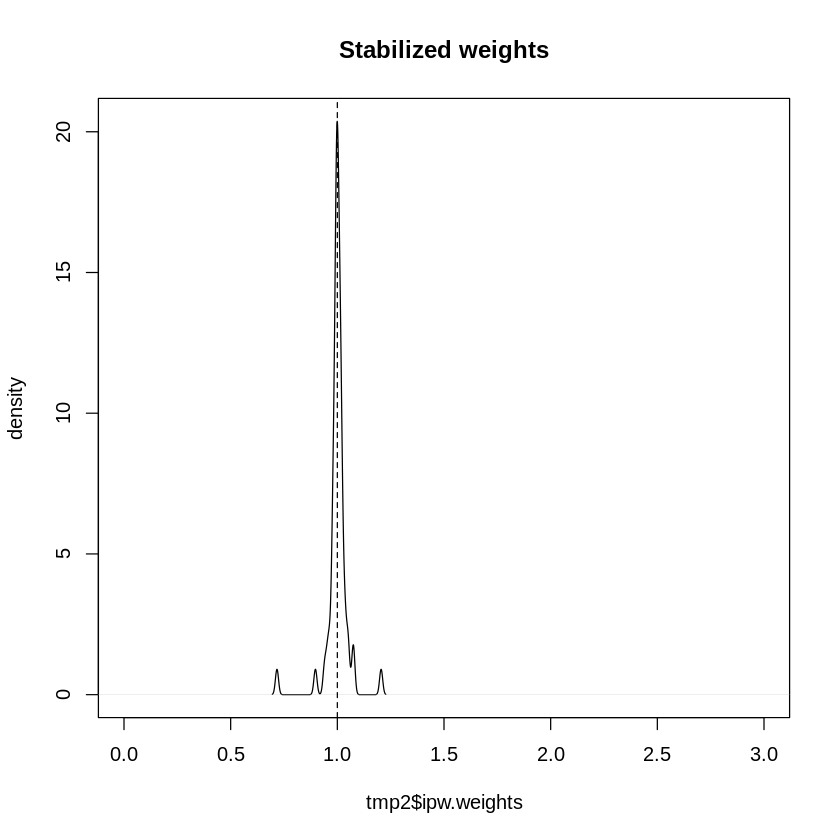

In [46]:
#______
## use propensity score (IPW) for ECE from F*S to D
ase_pbihb_data$f_s_int <- ase_pbihb_data$FSS*ase_pbihb_data$GSES

# VAS: A,G
tmp2 <- ipwpoint(
  exposure = f_s_int,
  family = "gaussian",
  link = "glm",
  numerator = ~ 1,
  denominator = ~ age + gender, #VAS: A,G
  data = ase_pbihb_data
)
# weights
summary(tmp2$ipw.weights)
ipwplot(weights = tmp2$ipw.weights, logscale = FALSE,
        main = "Stabilized weights", xlim = c(0,3))
# numerator & denominator models
summary(tmp2$num.mod)
summary(tmp2$den.mod)
# pasting IPW weights to data set
ase_pbihb_data$sw2 <- tmp2$ipw.weights
# weighting observations by stabilized weights to adjust for confounding (fit MSM)
msm2 <- (svyglm(CESD ~ FSS + GSES + FSS*GSES + age + gender,
                design = svydesign(~1, weights = ~sw2, data=ase_pbihb_data)))
s_msm2 <- summary(msm2); print(s_msm2)
pt(s_msm2$coefficients[6,3], df = msm2$df.residual, lower.tail = TRUE) # p-value of one-sided t-test
confint(msm2)

In [47]:
## VAS: A,G,M
tmp2b <- ipwpoint(exposure = f_s_int, family = "gaussian", link = "glm", numerator = ~ 1,
  denominator = ~ age + gender + MAIA_38, data = ase_pbihb_data)
ase_pbihb_data$sw2b <- tmp2b$ipw.weights
msm2b <- (svyglm(CESD ~ FSS + GSES + FSS*GSES + age + gender + MAIA_38,
                design = svydesign(~1, weights = ~sw2b, data=ase_pbihb_data)))
s_msm2b <- summary(msm2b); print(s_msm2b)
pt(s_msm2b$coefficients[7,3], df = msm2b$df.residual, lower.tail = TRUE) # p-value of one-sided t-test
confint(msm2b)


Call:
svyglm(formula = CESD ~ FSS + GSES + FSS * GSES + age + gender + 
    MAIA_38, design = svydesign(~1, weights = ~sw2b, data = ase_pbihb_data))

Survey design:
svydesign(~1, weights = ~sw2b, data = ase_pbihb_data)

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.0007122  0.1355534   0.005 0.995828    
FSS                      0.1435016  0.1005018   1.428 0.159201    
GSES                    -0.1429012  0.1150250  -1.242 0.219577    
age                     -0.0411542  0.0907611  -0.453 0.652087    
gender0.991631652042901  0.0838421  0.1982930   0.423 0.674138    
MAIA_38                 -0.5467108  0.1429971  -3.823 0.000348 ***
FSS:GSES                 0.0336774  0.0961944   0.350 0.727653    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.4980992)

Number of Fisher Scoring iterations: 2



[1] 0.6361733

,2.5 %,97.5 %
(Intercept),-0.27117348,0.27259783
FSS,-0.05807939,0.34508268
GSES,-0.37361201,0.08780966
age,-0.22319789,0.14088949
gender0.991631652042901,-0.31388315,0.48156745
MAIA_38,-0.83352657,-0.25989505
FSS:GSES,-0.15926417,0.22661893


In [48]:
# _______________________________________
## use doubleML for ECE

# implement causal model (inference on effect of variable d on y, confounds (A,G,F,S))
obj_dml_data2a <- double_ml_data_from_data_frame(df = ase_pbihb_data,
                                                x_cols = c("FSS","GSES","age","gender"),
                                                y_col = "CESD",
                                                d_col = "f_s_int")

# chose machine learning method
n_vars = 4 #number of covariates x
# init random forests learner with specified params
ml_l2a = lrn("regr.ranger", num.trees = 100, mtry = n_vars, min.node.size = 2, max.depth = 5)
ml_m2a = lrn("regr.ranger", num.trees = 100, mtry = n_vars, min.node.size = 2, max.depth = 5)
ml_g2a = lrn("regr.ranger", num.trees = 100, mtry = n_vars, min.node.size = 2, max.depth = 5)

doubleml_plr2a = DoubleMLPLR$new(obj_dml_data2a, ml_l2a, ml_m2a, ml_g2a, n_folds = 2, score = "IV-type")

# est causal effect of d on y
set.seed(123)
doubleml_plr2a$fit()
doubleml_plr2a$summary()
doubleml_plr2a$t_stat
doubleml_plr2a$pval/2 # (one-sided p-value) = 0.5*(two-sided p-value)
doubleml_plr2a$confint()

INFO  [14:17:48.330] [mlr3] Applying learner 'regr.ranger' on task 'nuis_l' (iter 1/2)
INFO  [14:17:48.363] [mlr3] Applying learner 'regr.ranger' on task 'nuis_l' (iter 2/2)
INFO  [14:17:48.525] [mlr3] Applying learner 'regr.ranger' on task 'nuis_m' (iter 1/2)
INFO  [14:17:48.556] [mlr3] Applying learner 'regr.ranger' on task 'nuis_m' (iter 2/2)
INFO  [14:17:48.722] [mlr3] Applying learner 'regr.ranger' on task 'nuis_g' (iter 1/2)
INFO  [14:17:48.773] [mlr3] Applying learner 'regr.ranger' on task 'nuis_g' (iter 2/2)
Estimates and significance testing of the effect of target variables
        Estimate. Std. Error t value Pr(>|t|)
f_s_int   -0.2051     0.1384  -1.482    0.138




f_s_int 
-1.482315

f_s_int 
0.06912819

,2.5 %,97.5 %
f_s_int,-0.4762591,0.06608542


In [49]:
## VAS: A,G,M
# implement causal model (inference on effect of variable d on y, confounds (A,G,M,F,S))
obj_dml_data2b <- double_ml_data_from_data_frame(df = ase_pbihb_data,
                                               x_cols = c("FSS","GSES","MAIA_38","age","gender"),
                                               y_col = "CESD",
                                               d_col = "f_s_int")

# chose machine learning method
n_vars = 5 #number of covariates x
# init random forests learner with specified params
ml_l2b = lrn("regr.ranger", num.trees = 100, mtry = n_vars, min.node.size = 2, max.depth = 5)
ml_m2b = lrn("regr.ranger", num.trees = 100, mtry = n_vars, min.node.size = 2, max.depth = 5)
ml_g2b = lrn("regr.ranger", num.trees = 100, mtry = n_vars, min.node.size = 2, max.depth = 5)

doubleml_plr2b = DoubleMLPLR$new(obj_dml_data2b, ml_l2b, ml_m2b, ml_g2b, n_folds = 2, score = "IV-type")

# est causal effect of d on y
set.seed(123)
doubleml_plr2b$fit()
doubleml_plr2b$summary()
doubleml_plr2b$t_stat
1 - doubleml_plr2b$pval/2 # (one-sided p-value) = 1 - 0.5*(two-sided p-value)
doubleml_plr2b$confint()

INFO  [14:17:50.217] [mlr3] Applying learner 'regr.ranger' on task 'nuis_l' (iter 1/2)
INFO  [14:17:50.249] [mlr3] Applying learner 'regr.ranger' on task 'nuis_l' (iter 2/2)
INFO  [14:17:50.408] [mlr3] Applying learner 'regr.ranger' on task 'nuis_m' (iter 1/2)
INFO  [14:17:50.439] [mlr3] Applying learner 'regr.ranger' on task 'nuis_m' (iter 2/2)
INFO  [14:17:50.599] [mlr3] Applying learner 'regr.ranger' on task 'nuis_g' (iter 1/2)
INFO  [14:17:50.630] [mlr3] Applying learner 'regr.ranger' on task 'nuis_g' (iter 2/2)
Estimates and significance testing of the effect of target variables
        Estimate. Std. Error t value Pr(>|t|)
f_s_int   0.01527    0.15235     0.1     0.92




f_s_int 
0.1002554

f_s_int 
0.5399292

,2.5 %,97.5 %
f_s_int,-0.2833263,0.3138741
